# PART III - Machine Learning
#####  @ Haim Goldfisher

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #(divide into train/test)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics #(vital for notebook)
from sklearn.metrics import classification_report,confusion_matrix


# DATASET Num 2 : REGRESSION

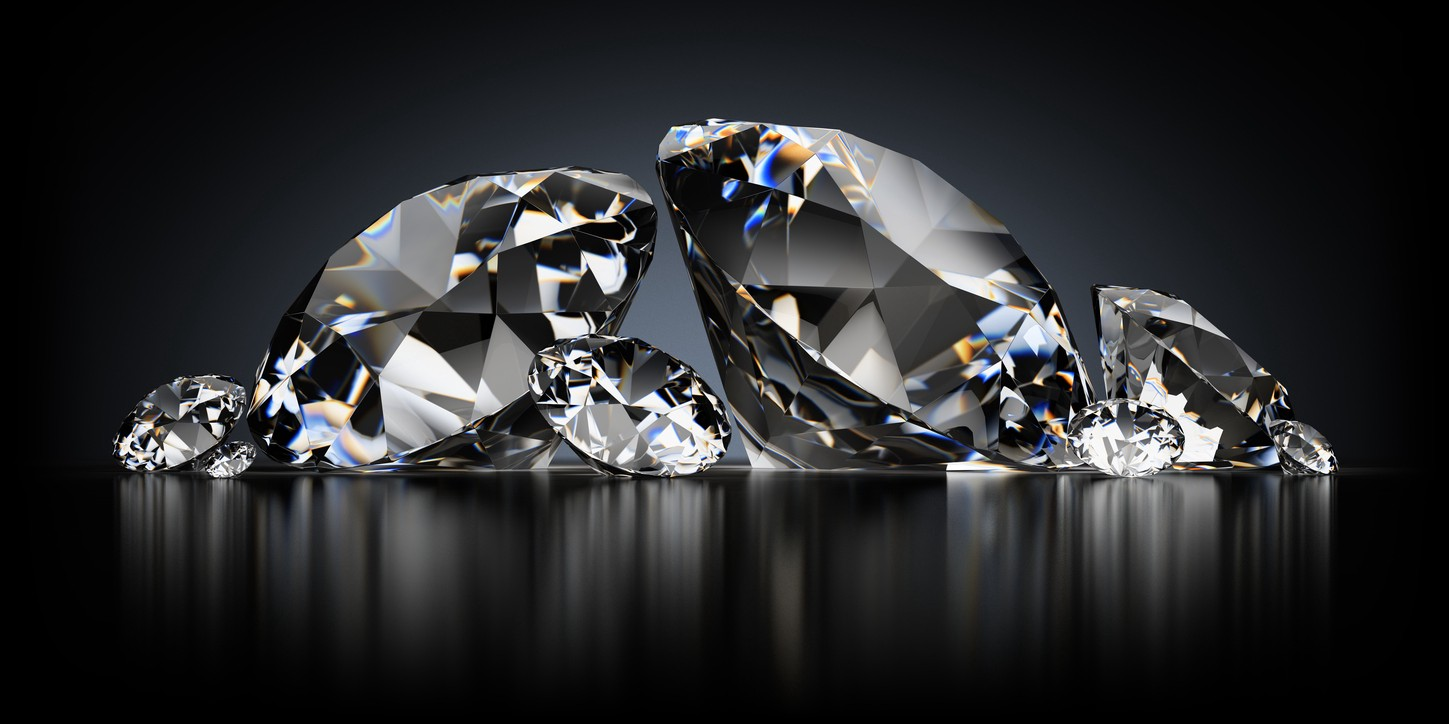

### Quick review:
##### Link to the dataset: https://www.kaggle.com/shivam2503/diamonds
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.
I would like to create a model which will predict the connection between the "" of the diamond and it's price.
The things that we going to find out:
- Is there a connection between "" and the diamond's price?
- Do people are likly to pay a high price on a diamond because of it's look or it's quality?

Firstly, we will upload the dataset:

In [24]:
diamonds = pd.read_csv('C:\Haim\Anaconda\diamonds.csv')

diamonds # display the first and last 5 rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


There are 10 attributes included in the dataset including the target ie. price.

###### Feature description:

- **Price:** price in US dollars ($\$$326 - $\$$18,823) This is the target column containing tags for the features. 

###### The 4 Cs of Diamonds:

- **Carat:** (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

- **Cut:** (Fair$\rightarrow$Good$\rightarrow$Very Good$\rightarrow$Premium$\rightarrow$Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

- **Color:** from J (worst) to D (best). The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

- **Clarity:** (I1 (worst)$\rightarrow$SI2$\rightarrow$SI1$\rightarrow$VS2$\rightarrow$VS1$\rightarrow$VVS2$\rightarrow$VVS1$\rightarrow$IF (best)). Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

###### Dimensions:

- **Depth:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.

- **Table:** The width of the diamond's table expressed as a percentage of its average diameter.

- **X:** Length in mm (0-10.74).

- **Y:** Width in mm (0-58.9).

- **Z:** Depth in mm (0-31.8).

###### What else do we know?
- Because the response variable is continuous, this is a **regression** problem. 

In [25]:
diamonds.shape

(53940, 11)

In [26]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


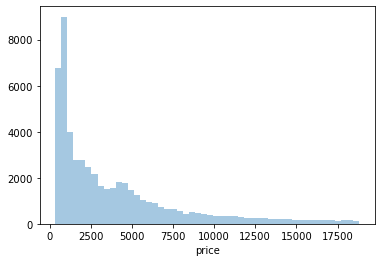

In [27]:
sns.distplot(diamonds['price'],kde=False)

In [28]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## Data Preprocessing

- Data cleaning.
- Identifying and removing outliers.
- Encoding categorical variables.

In [29]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [30]:
diamonds.duplicated().sum()

0

As you can see, the dataset has no null data, it also has no duplicated rows.

In [31]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Let's take a look at the x,y,z columns. In the min's row, we have some illegal values. Those diamonds are dimensionless, or lost one of the dimensions. We must filter out those as it clearly faulty data points

In [32]:
#Dropping dimentionless diamonds
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 11)

We had at the start 53,940 diamonds, now we have 53,920. It means that we "lost" only 20 diamonds.

I decided to remove some unnecessary columns.
It seems that the first column present the index of the row. We will drop it:

In [33]:
diamonds.drop('Unnamed: 0', axis = 1, inplace = True) # its just index

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


As we saw, cut, color aand clarity are ordinal data. We would like to make them numerical so 1 will present the worst and the biggest number will present the best.
Firstly, we would like to understand what do those columns icluded.

In [34]:
diamonds['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

According to the explantionfor, the order is: Fair, Good, Very Good, Premium, Ideal.

So that, we would like to set the order:

1 - Fair

2 - Good

3 - Very Good

4 - Premium

5 - Ideal

In [35]:
diamonds['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

According to the explantionfor, D is the best and J is the worst.

So that, we would like to set the order:

1 - J

2 - I

3 - H

4 - G

5 - F

6 - E

7 - D

In [36]:
diamonds['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

According to the explantionfor, the order from best to worst: FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.

So that, we would like to set the order:

1 - I3 (level 3 inclusions)

2 - I2

3 - I1

4 - SI2

5 - SI1

6 - VS2

7 - VS1

8 - VVS2

9 - VVS1

10 - IF

11 - FL (flawless)

In [37]:
#prepertion - categorical variables

diamonds['cut'] = diamonds['cut'].map({
    'Ideal'        :5,
    'Premium'      :4,
    'Very Good'    :3,
    'Good'         :2,
    'Fair'         :1
})

diamonds['color'] = diamonds['color'].map({
    'D'            :7,
    'E'            :6,
    'F'            :5,
    'G'            :4,
    'H'            :3,
    'I'            :2,
    'J'            :1
})
diamonds['clarity'] = diamonds['clarity'].map({
    'FL'            :11,
    'IF'            :10,
    'VVS1'          :9,
    'VVS2'          :8,
    'VS1'           :7,
    'VS2'           :6,
    'SI1'           :5,
    'SI2'           :4,
    'I1'            :3,
    'I2'            :2,
    'I13'           :1
})

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,4,61.0,58.0,2757,6.15,6.12,3.74


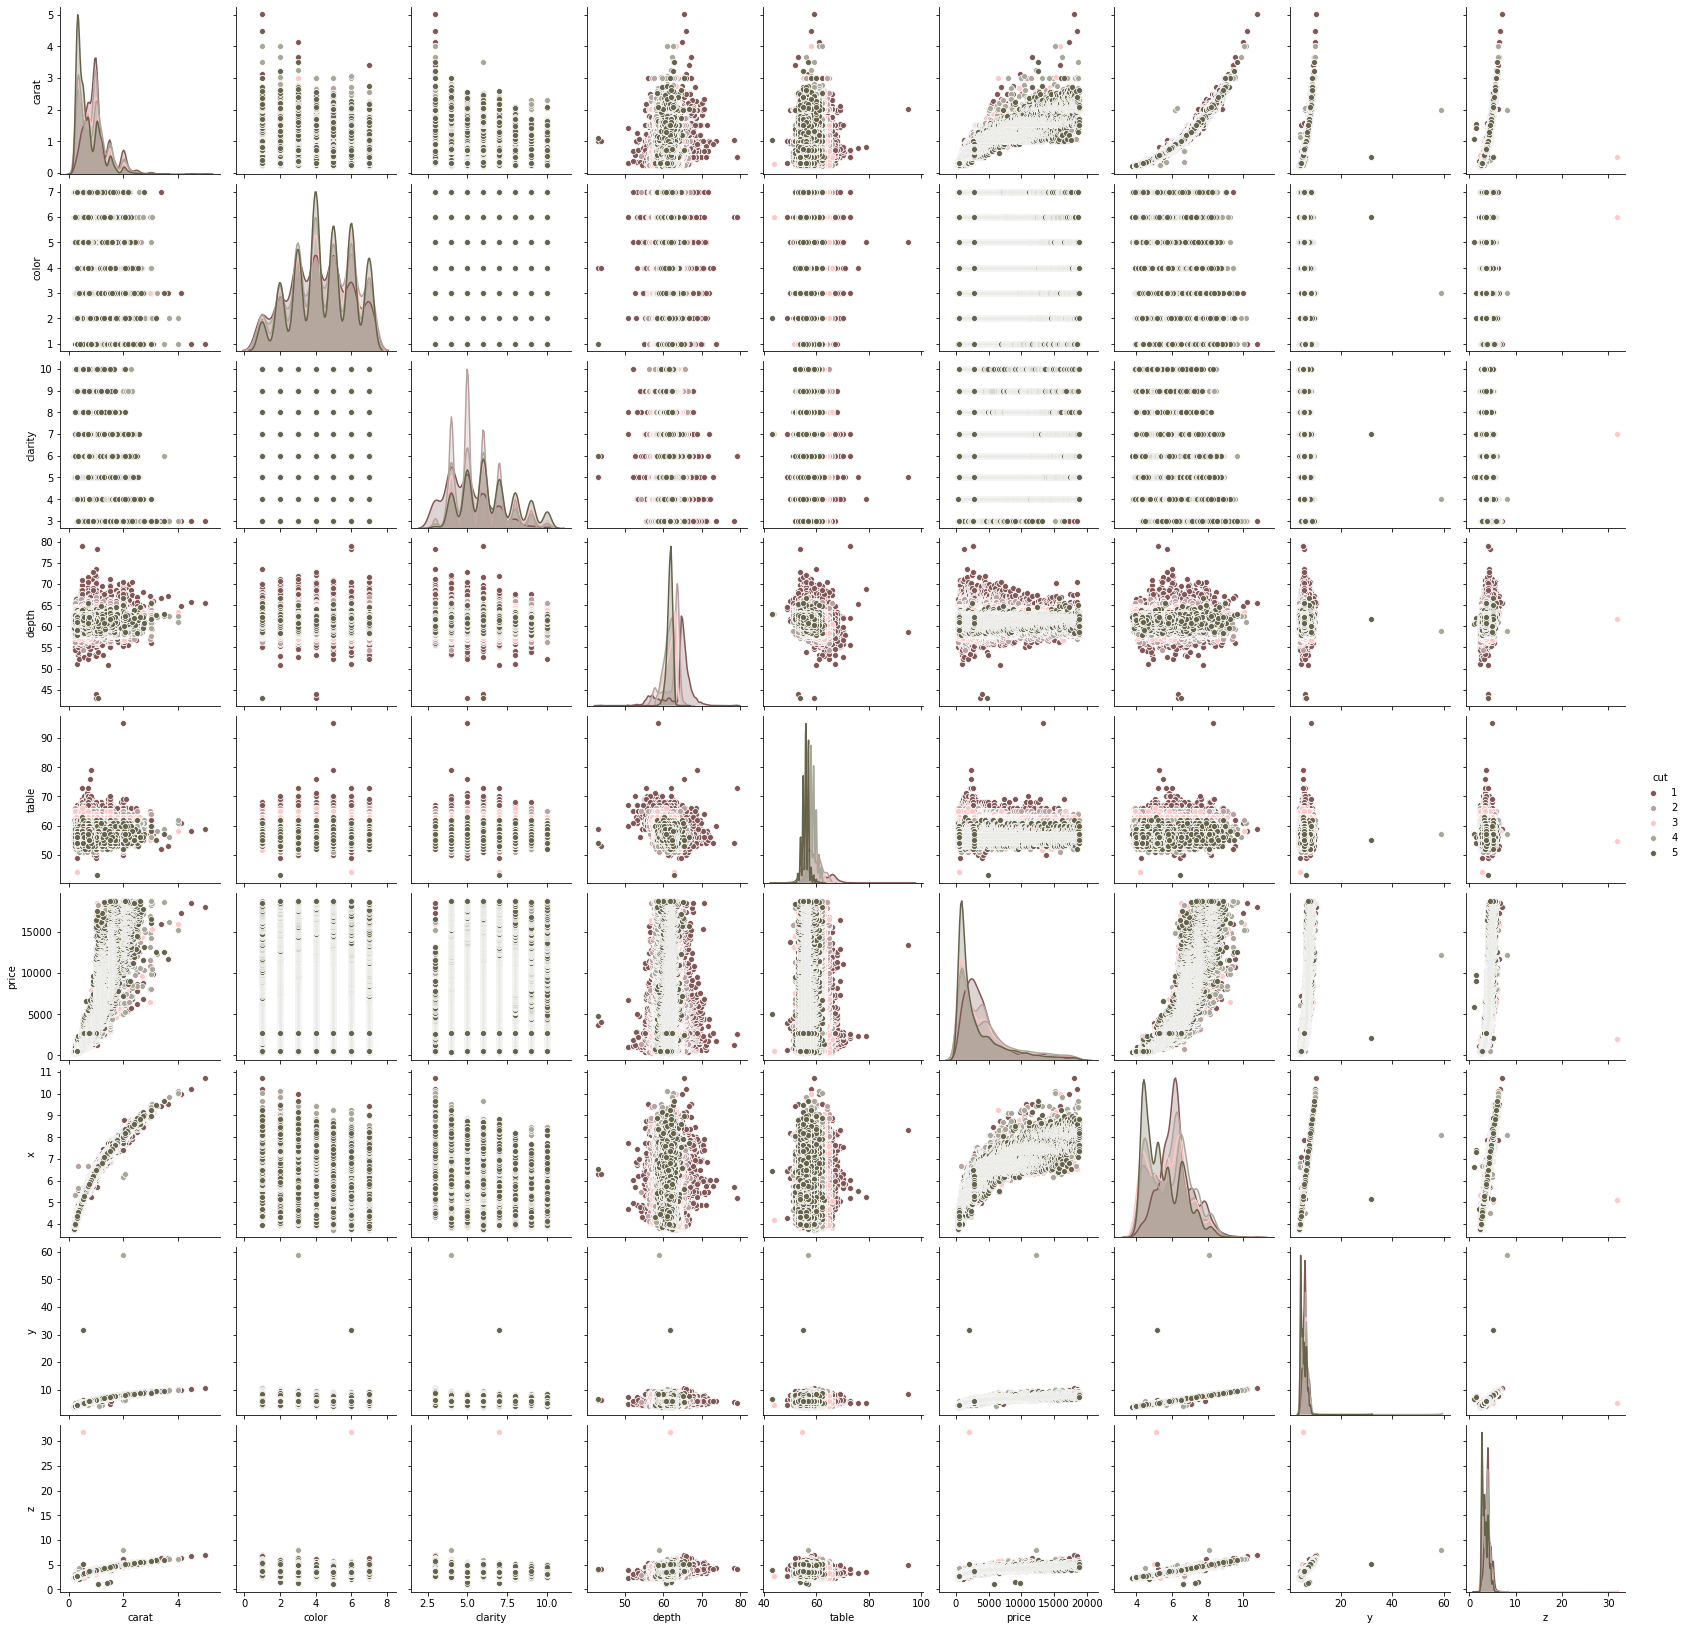

In [38]:
#Let's have a look at data 
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(diamonds, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count.

# יש פה כאב ראש רציני, אבחר כמה ספציפיים שיעזרו להבין את הדאטה

A few points to notice in these pair plots

There are some features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model.

- "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
- The "depth" should be capped but we must examine the regression line to be sure.
- The "table" featured should be capped too.
- Let's have a look at regression plots to get a close look at the outliers.

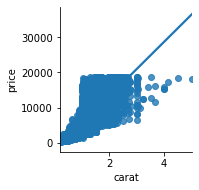

In [39]:
sns.pairplot(diamonds,y_vars='price',x_vars='carat', kind='reg')

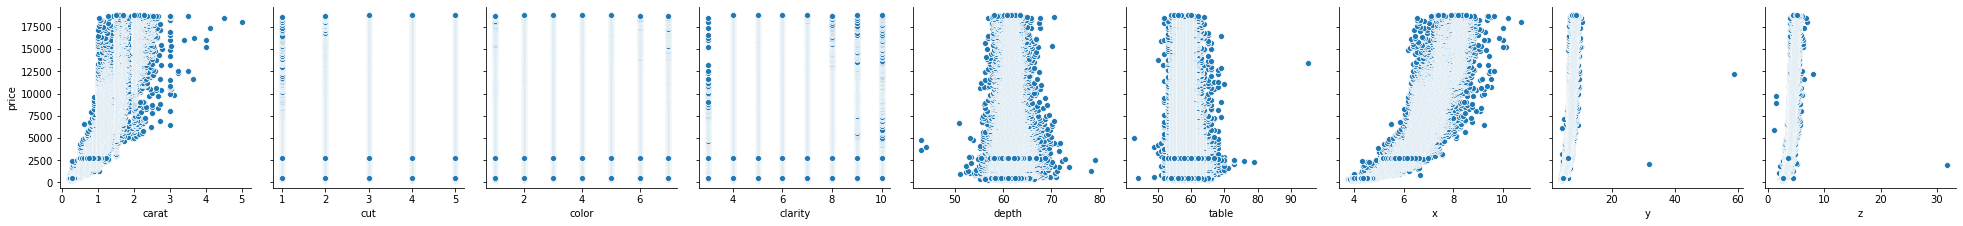

In [40]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
sns.pairplot(diamonds,y_vars='price',x_vars=features, kind='scatter', height=3)

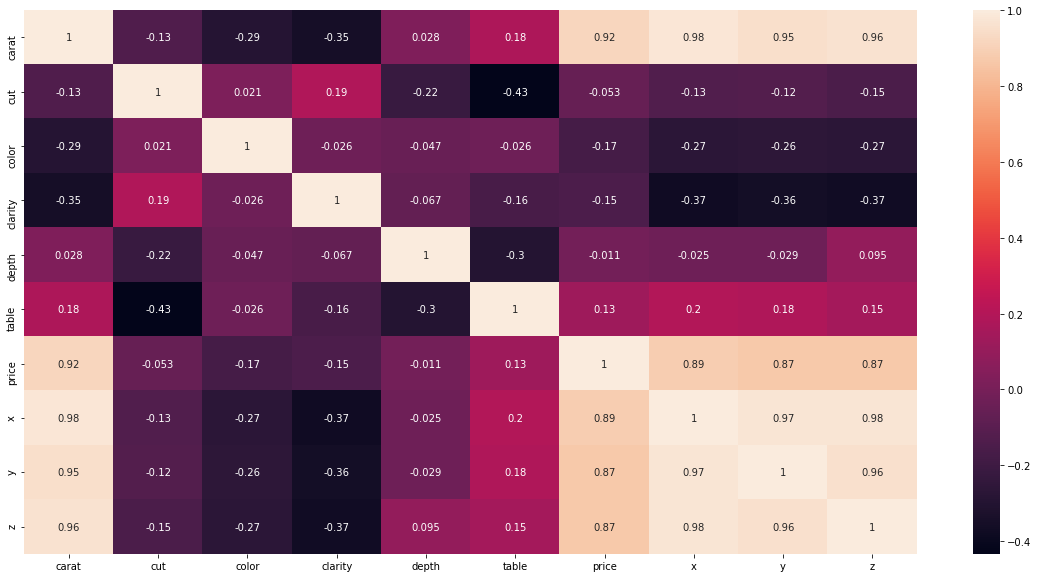

In [41]:
#i want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(diamonds.corr(), annot=True)

The heatmap tells us the biggest story. We can infer that:
- The carat is the biggest factor to determine the price of a diamond. It obviously that X,Y and Z have a direct impact on the carat weight. The other features have a small value compare to it. It makes me think what would happen if we didn't have the size of the diamond. However, we can understand that the size means a lot when it comes to diamonds.
- If the carat has direct impact from the x,y,z values, maybe those columns are useless for the model. Because all those columns tell the same story. Moreover, maybe that fact can make our model unstable (to much weight to the size).
- "depth", "cut" and "table" show low correlation. We could consider dropping it.
- Diamonds are symetric. That fact has no connection to our model, but we can see that there is a huge correlation between x,y and z.

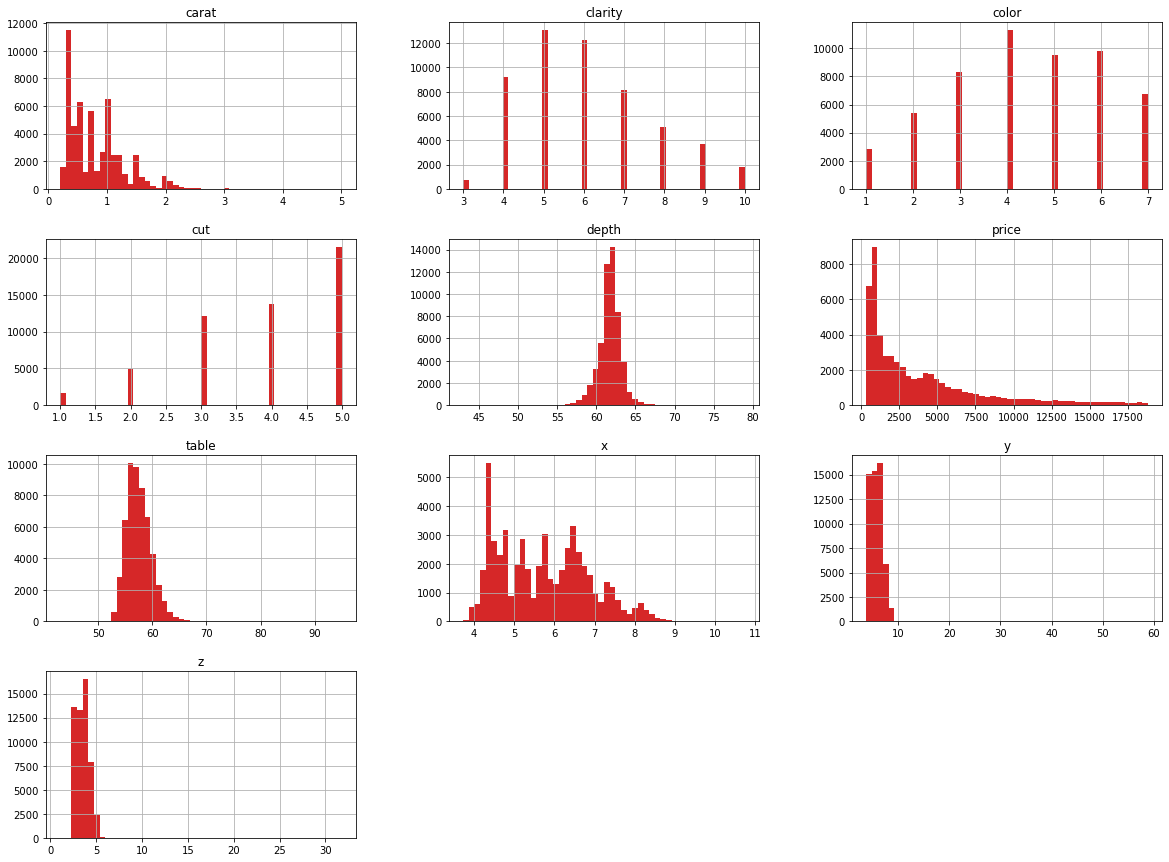

In [42]:
diamonds.hist(bins=50,figsize=(20,15), color= 'C3')
plt.show()

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

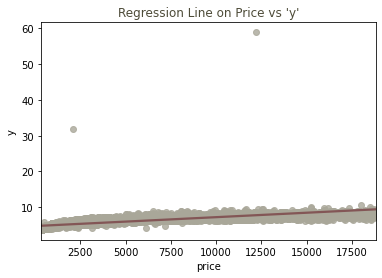

In [43]:
ax = sns.regplot(x="price", y="y", data=diamonds, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

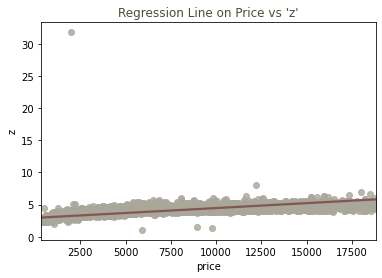

In [44]:
ax= sns.regplot(x="price", y="z", data=diamonds, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

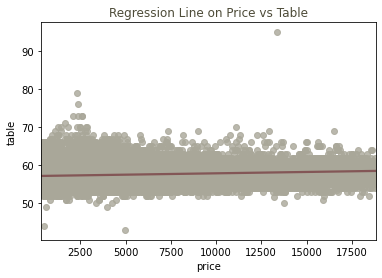

In [45]:
ax=sns.regplot(x="price", y="table", data=diamonds, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

In [48]:
#Dropping the outliers. לחשוב טוב מאוד מה אני רוצה להסיר
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["x"]<30)]
diamonds = diamonds[(diamonds["y"]<30)]
diamonds = diamonds[(diamonds["z"]<30)&(diamonds["z"]>2)]
diamonds.shape

(53907, 10)

Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

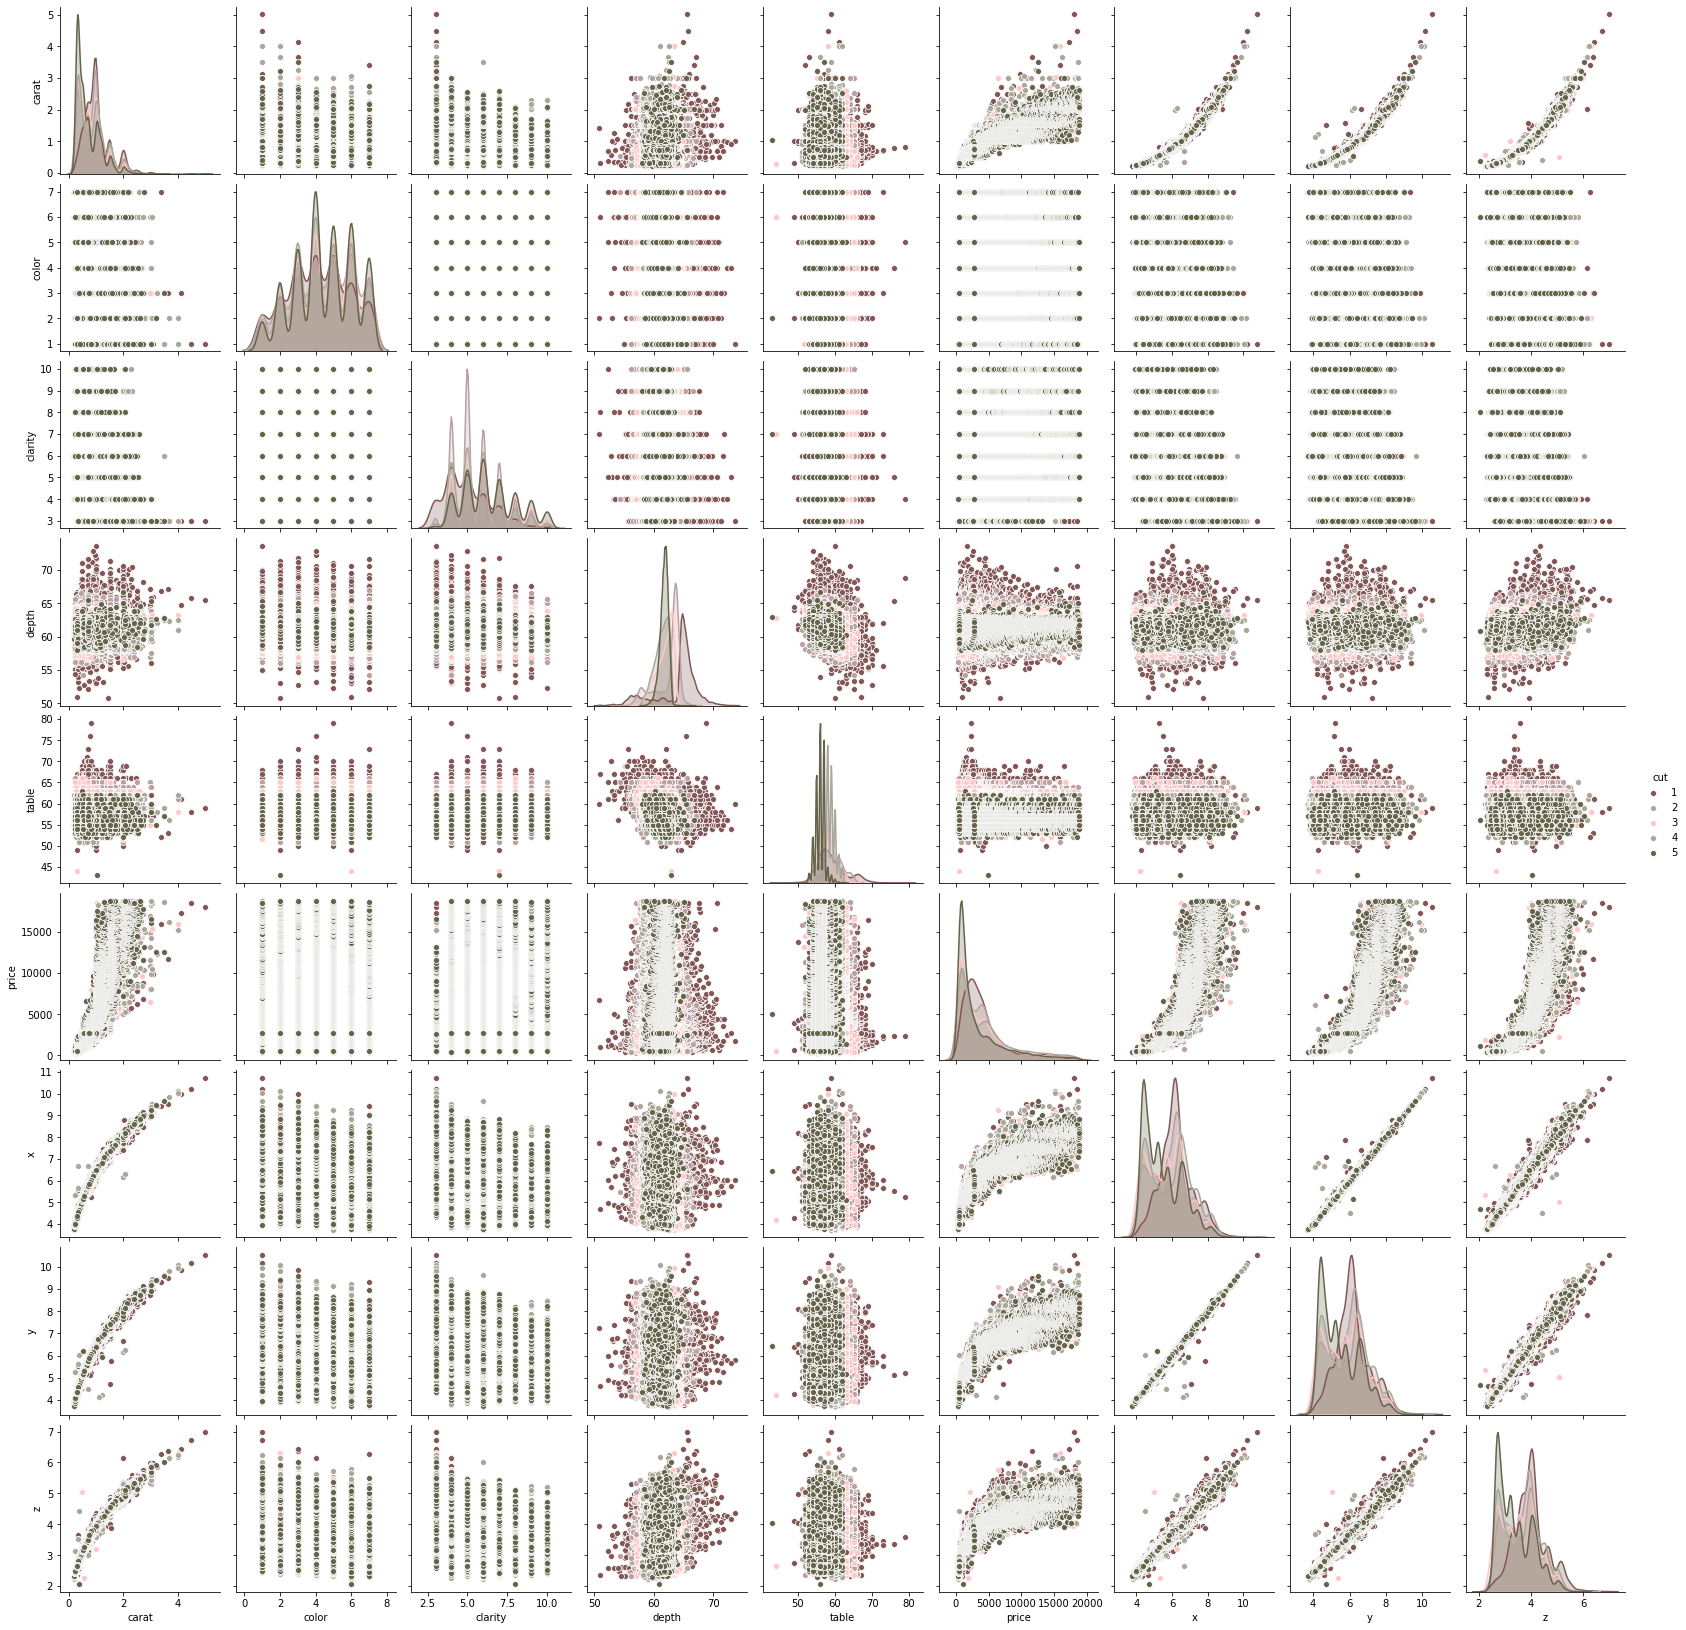

In [49]:
ax=sns.pairplot(diamonds, hue= "cut",palette=shade)


In [50]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,3.904465,4.405977,6.051626,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.116236,1.701286,1.647087,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,1.000000,1.000000,3.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,3.000000,3.000000,5.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,7.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,10.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


# SCALING

In [60]:
features  = ['carat','cut','color','clarity', 'depth', 'table', 'x','y','z']
ss = StandardScaler()
df = diamonds
df[features] = ss.fit_transform(df[fitFetuers])
df.head(3)

NameError: name 'StandardScaler' is not defined

## Model Building
Steps involved in Model Building

- Setting up features and target
- Build pipeline of standard scalar and model for five different regressor.
- Fit all the models on training data
- Get mean of cross valdation on training set for all the models for negative root mean squre error
- Pick the model with best crossvalidation score
- Fit the best model on training set and get

In [51]:
target = diamonds['price']
model_data = diamonds.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(model_data, target, random_state=0)

In [52]:
knn = KNeighborsRegressor()
knn = knn.fit(X_train, y_train)
knn

KNeighborsRegressor()

In [53]:
y_pred = knn.predict(X_test)

In [54]:
metrics.r2_score(y_test, y_pred)

0.9533437956782028

Nice results there, lets improve our model so we can tell it to mother

In [57]:
k = list(range(1,31))
wegrid = ['uniform','distance']
d = {'n_neighbors' :k,'weights': wegrid}

In [58]:
grid = GridSearchCV(knn, d, cv=10, scoring='r2')
grid.fit(model_data, target)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [59]:
print("Score: ",grid.best_score_," Params: ",grid.best_params_)

Score:  0.09566936071766541  Params:  {'n_neighbors': 15, 'weights': 'distance'}


In [ ]:
# Assigning the featurs as X and trarget as y
y= label_data["price"]
X= label_data.drop(["price"],axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [45]:
# create a Python list of feature names
feature_cols = ['year', 'mileage']

# use the list to select a subset of the original DataFrame
X = cars[feature_cols]

# equivalent command to do this in one line
X = cars[['year', 'mileage']]

# print the first 5 rows
X.head()

,year,mileage
0,2008,274117.0
1,2011,190552.0
2,2018,39590.0
3,2014,64146.0
4,2018,6654.0


In [37]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(2499, 3)


In [40]:
# select a Series from the DataFrame
y = cars['price']

# equivalent command that works if there are no spaces in the column name
y = cars.price

# print the first 5 values
y.head()

0     6300
1     2899
2     5350
3    25000
4    27700
Name: price, dtype: int64

In [46]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(2499,)


In [47]:
## Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1874, 2)
(1874,)
(625, 2)
(625,)


In [49]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [50]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-1917026.8750996757
[ 9.60987514e+02 -4.35878891e-02]


In [51]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('year', 960.9875143528024), ('mileage', -0.04358788913652706)]

In [52]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [53]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [54]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [55]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [56]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [ ]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))